# Изучение закономерностей, определяющих успешность игр

## Исследование продаж игр

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель и задачи исследования

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры 

### План работы:

- Открыть файл с данными и изучить общую информацию 
- Подготовка данных
- Исследовательский анализ
- Портрет пользователя каждого региона
- Проверка гипотез

### Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()
data.duplicated().sum()
data.isnull().sum()
data.info()
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Привел столбцы и значения к нижнему регистру.

Дубликатов нет.

Пропущены значения в name, year_of_release, genre, critic_score, user_score, rating. 

Больше всего в critic_score(8578), user_score(6701), rating(6766). - оставлю пропуски, так как их слишком много

Меньше всего в name(2), year_of_release(269), genre(2).  

Пропуски в name(2),genre(2), year_of_release(269) возникли скорее всего из за некорректности данных, ошибках заполнения человеком.

В critic_score(8578), user_score(6701), rating(6766) возможно из за того что рейтинг и оценки еще не сформировались либо так же ошибка заполнения данных.

In [4]:
data[data['name'].isnull()]
        
data = data.dropna(subset=['genre']).reset_index(drop=True)
data.isnull().sum()

data[data['year_of_release'].isnull()]
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data.isnull().sum()

#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format="%Y")
data['year_of_release'] = data['year_of_release'].astype(int)
#data.info()

data['user_score'].unique()
data['user_score'] = data['user_score'].replace('tbd', 'nan')
data['user_score'] = data['user_score'].astype(float)
#data['user_score'] = data['user_score'].fillna(value=0)
#sorted(data['user_score'].unique())
data.info()

data['rating'].unique()
data['rating'] = data['rating'].fillna(value='unknown')
data['rating'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


array(['e', 'unknown', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

Строчки где пропущено название и жанр одни и те же, удалю так как их мало.
Удалил строки в столбце с годом релиза, так как их меньше 300, это 1.6% от всего датасета.
Изменил тип данных в столбце с годом релиза на datetime.

Заменил значения tbd(Подлежит определению) на nan в столбце с оценкой пользователей. 


### Подготовка данных

In [5]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#data

Посчитал суммарные продажи во всех регионах.

In [6]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


### Исследовательский анализ

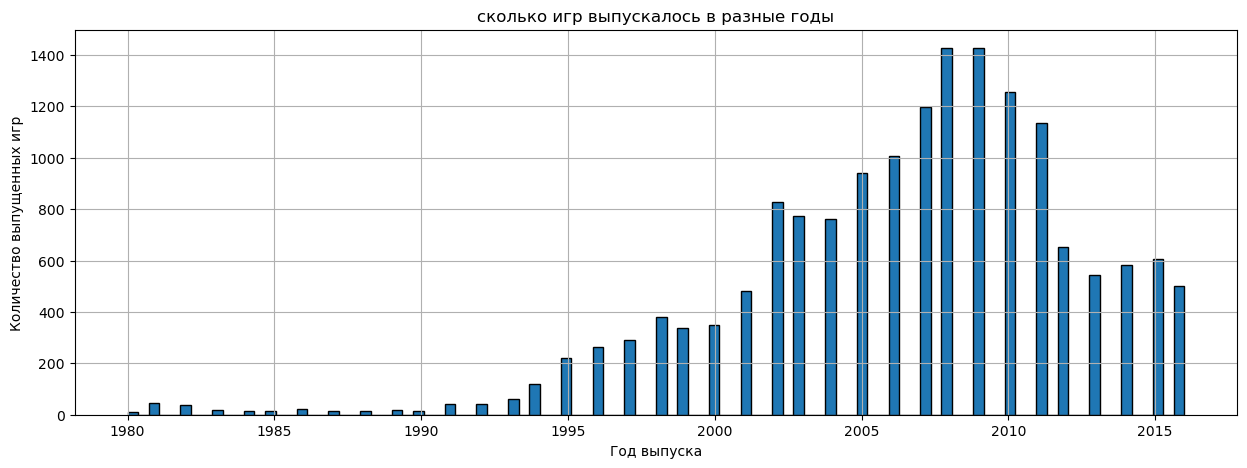

In [7]:
data.hist('year_of_release', bins=100, ec='black', figsize=(15,5))
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.title('сколько игр выпускалось в разные годы')

data.loc[data['year_of_release'] == '1991-01-01'].count()

dataa = data[data['year_of_release'] > 1993]

#data.loc[data['year_of_release'] == 1993].count()

Судя по графику можно сказать данные до 1991 года можно не важны, так как игр тогда выпускалось мало. Хотя и есть один подьем в 1982 - 46 игр. Поэтому возьмем данные с 1993 - 60 игр

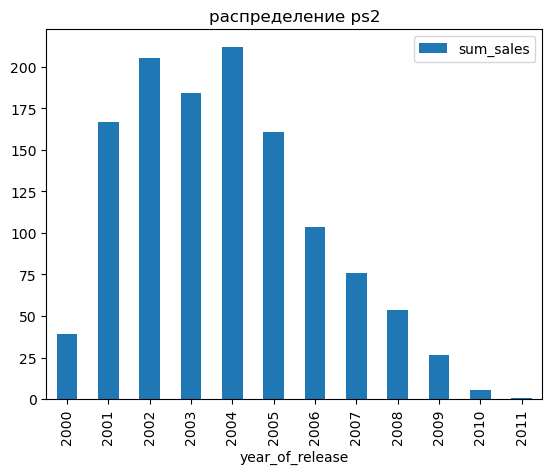

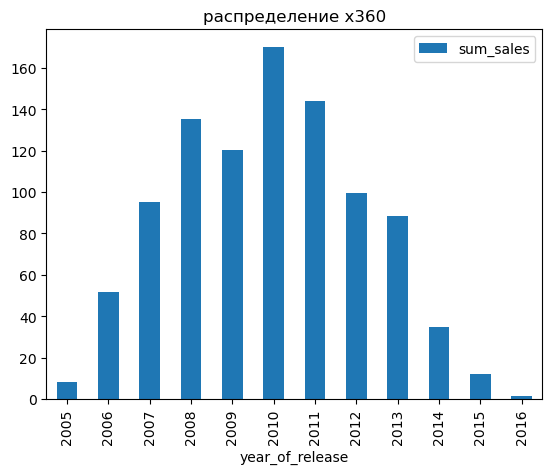

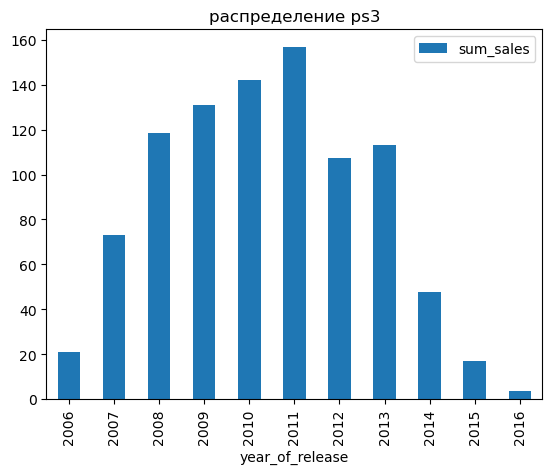

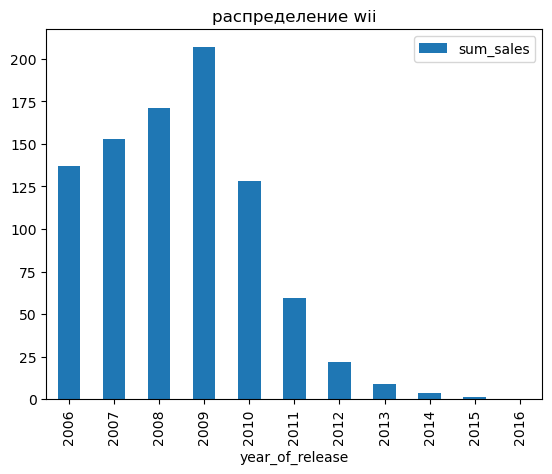

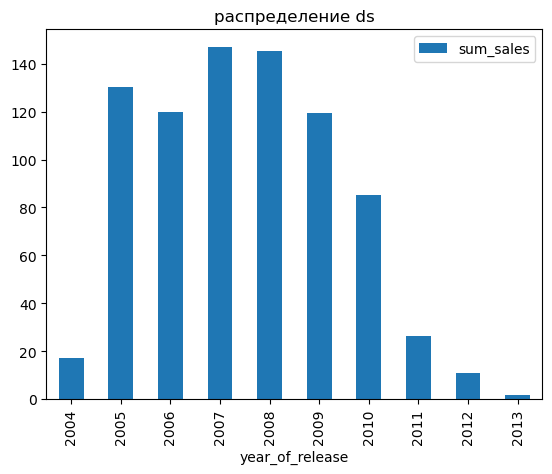

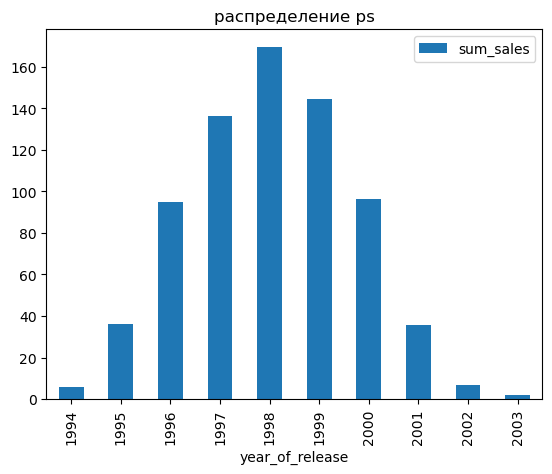

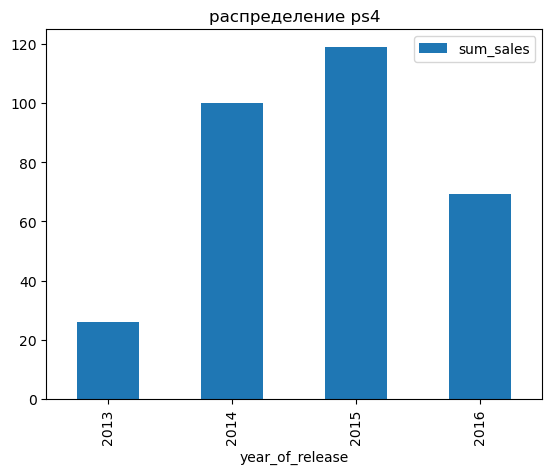

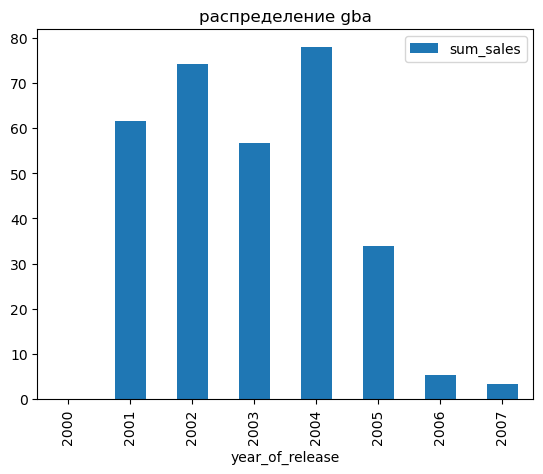

In [8]:
top_platform = dataa.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(8)
top_platform

for platform in top_platform.index:
    dataa_plot = dataa[dataa['platform'] == platform].groupby('year_of_release').agg({'sum_sales':'sum'})
    dataa_plot.plot(kind='bar')
    plt.xticks(ticks=range(len(dataa_plot)), labels=dataa_plot.index.astype(int))
    plt.title(f'распределение {platform}')
    plt.show()

Выбраны 8 основных платформ по продажам.
В основном пик продаж по платформа приходится на 4-6 лет. 
На ps2 этот пик пришелся на 2001-2005.
На х360 2008-2012.
На ps3 2008-2013.
На wii 2006-2009.
На ds 2005-2009.
На ps 1996-2000. 
На ps4 2014-...
На gba 2001-2005.
Соответственно новые платформы появляются и исчезают за 4-6 лет.

Так как срок жизни платформы приходится на 4-6 лет, актуальный период нужно подобрать так чтобы на 2017 год эти платформы все еще были в топах продаж. Поэтому возьмем период с 2014 по 2017 год.

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
psv      22.40
wii       5.07
psp       0.36
Name: sum_sales, dtype: float64

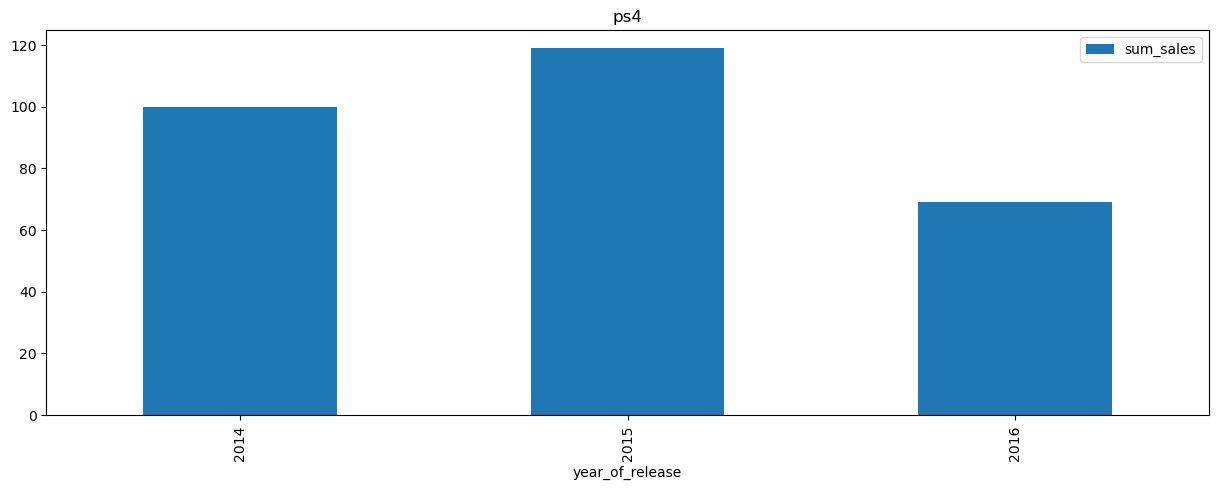

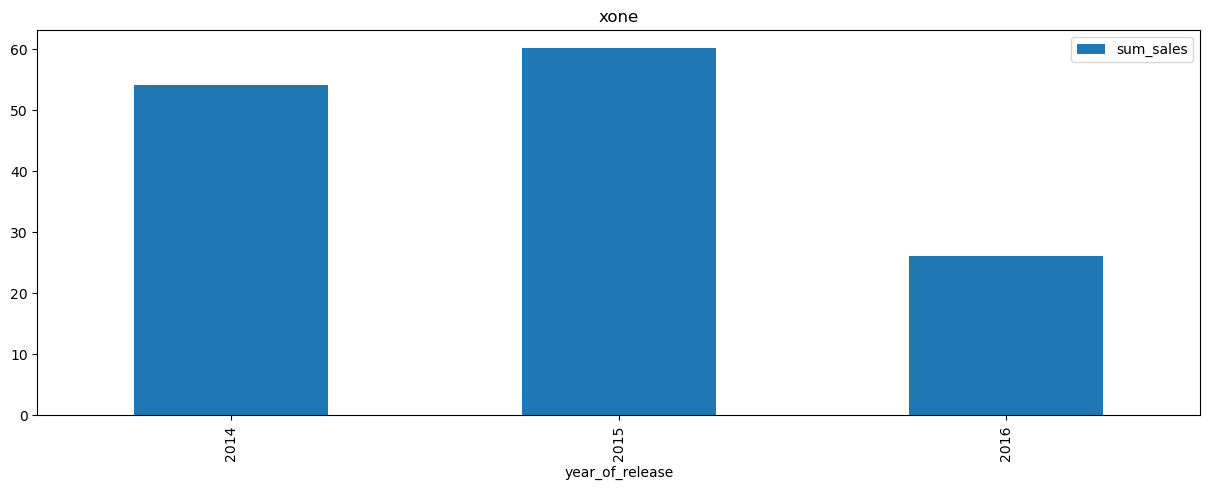

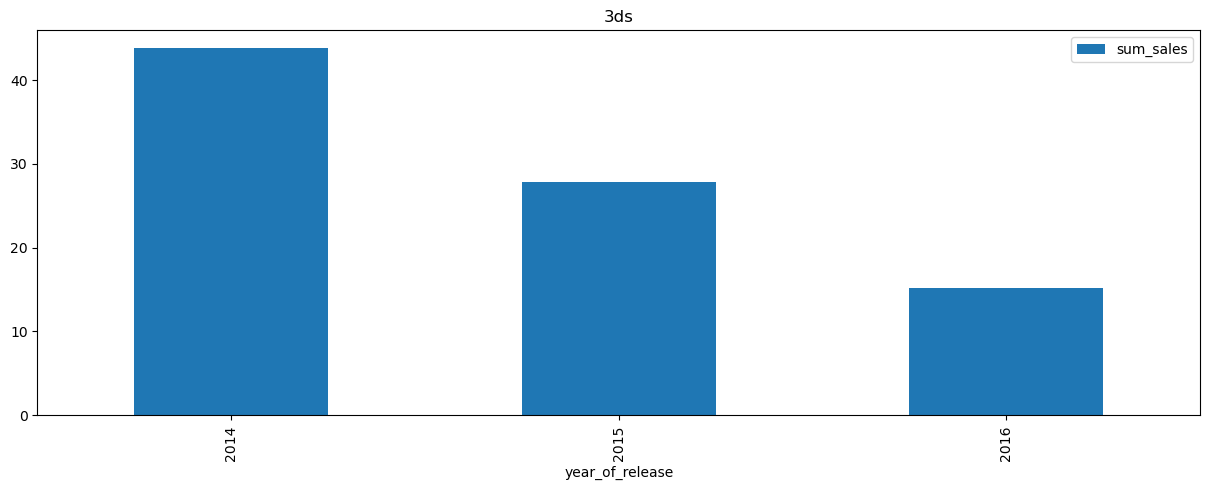

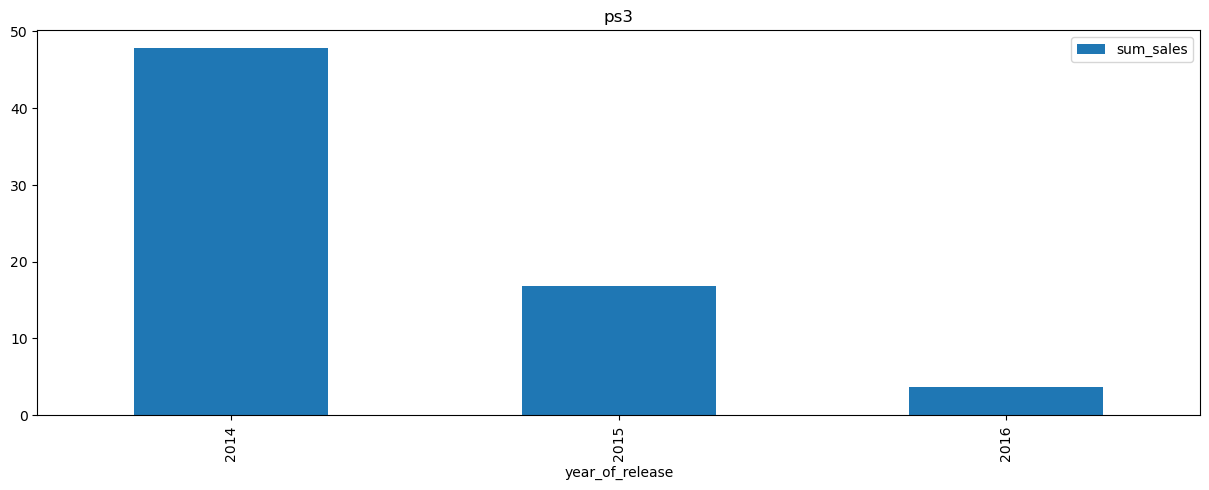

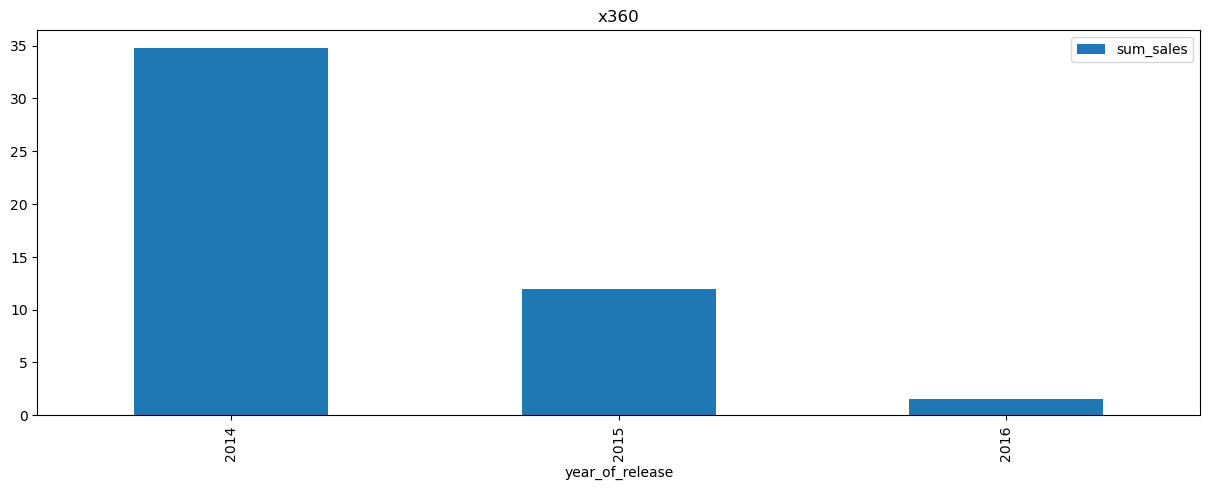

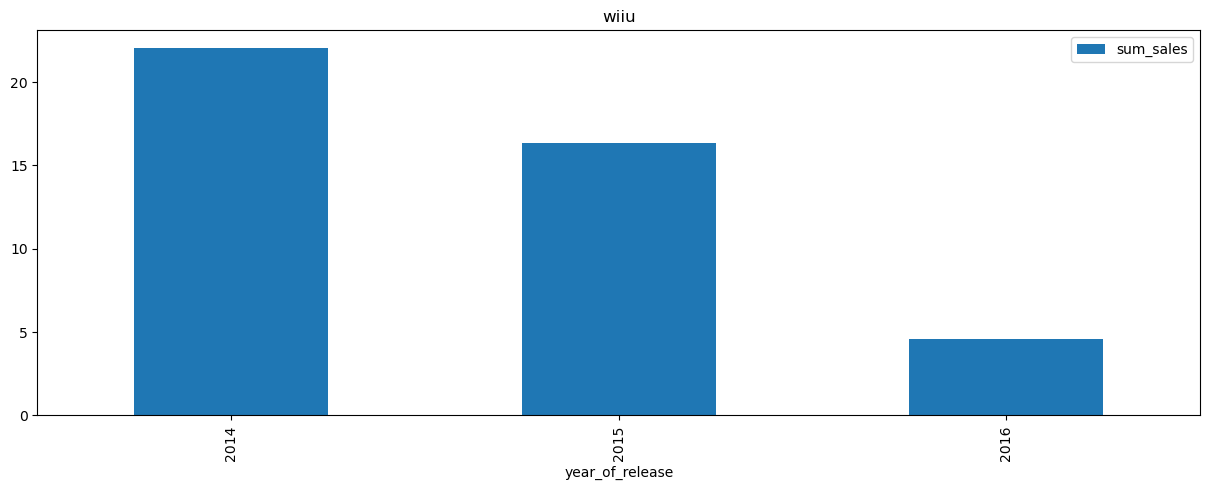

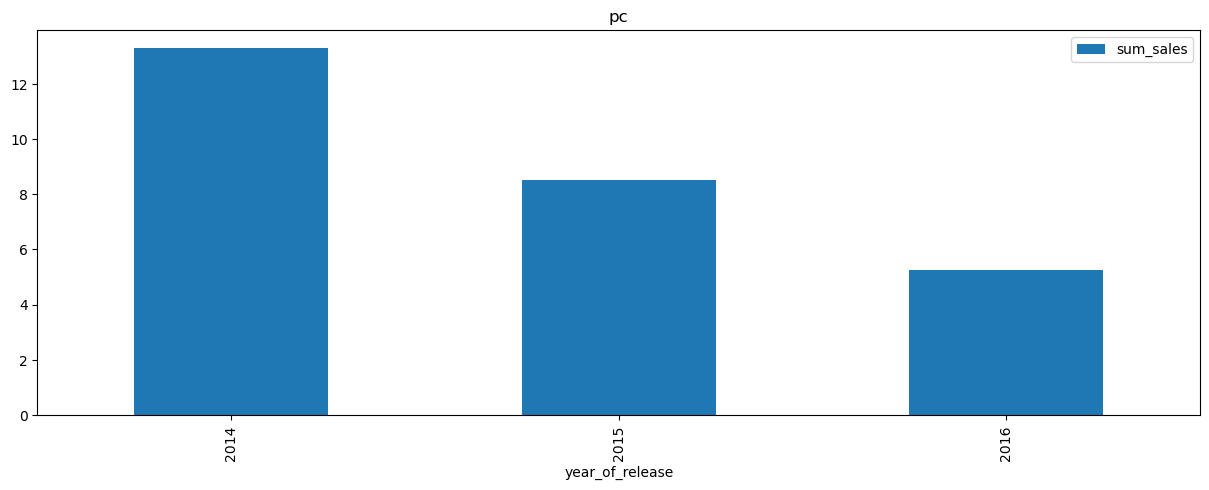

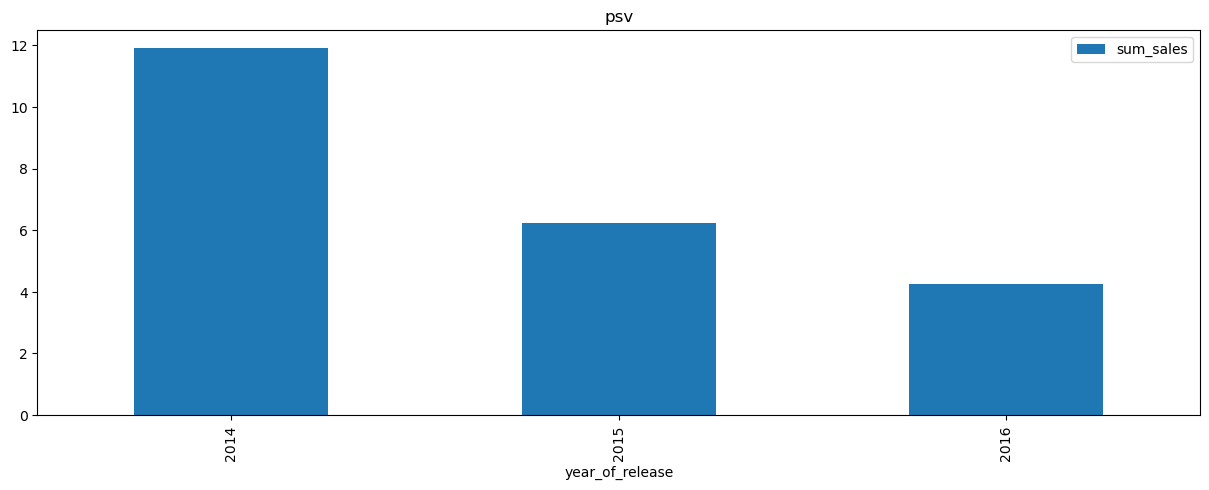

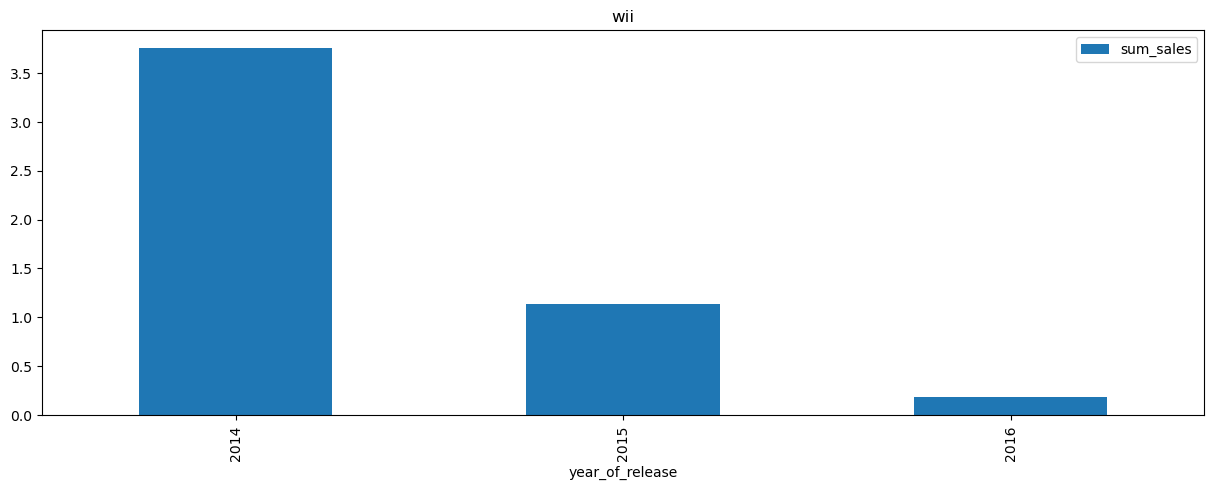

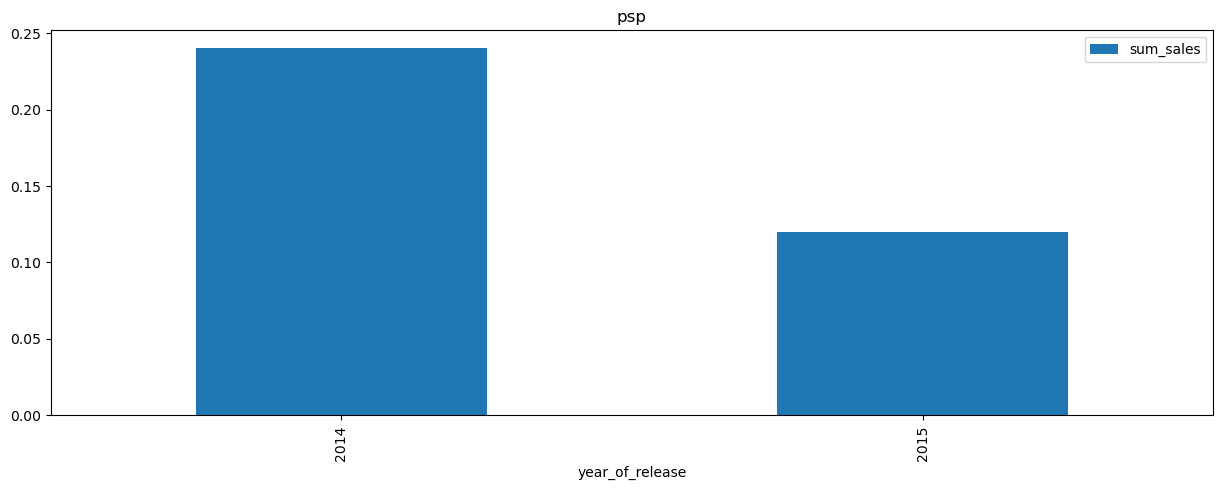

In [9]:
data_actual = dataa.query('year_of_release >= 2014')
platform_actual = data_actual.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10)
platform_actual

for platform in platform_actual.index:
    data_actual[data_actual['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)
    
platform_actual

Так как данные за 2016 неполные, рассмотрим период 2014-2015 г.

Лидируют, находятся на подьеме и потенциально прибыльные по продажам xone и ps4. Так же можно дополнить играми pc, так как по сути это постоянная платформа, у которой не может выйти новая версия и игры на нее всегда будут востребованы.

У остальных платформ спад продаж в 2015 году. 

In [10]:
actual_platforms = ["ps4", "xone", "pc", "3ds", "ps3", "x360", "wiiu", "psv", "wii", "psp"]

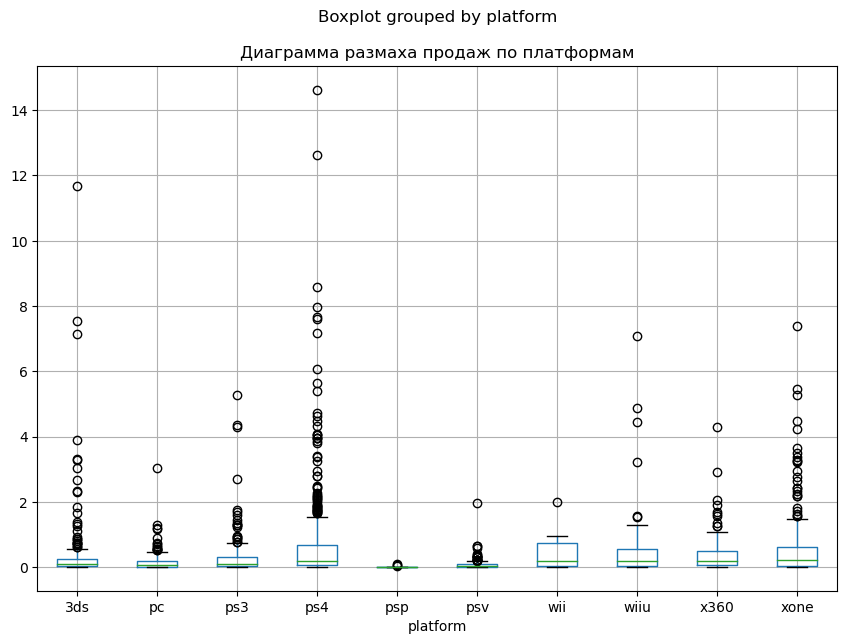

In [11]:
#for platform in platform_actual.index:
    #data_actual[data_actual['platform'] == platform].plot(y='sum_sales', kind='box', vert=False, figsize=(15,3))
    #plt.xlim(0, 3) 
    #plt.title(platform)


data_actual.query('platform in @actual_platforms')[['platform', 'name', 'sum_sales']].boxplot(column='sum_sales', 
                                                                                              by='platform', 
                                                                                              grid=True, 
                                                                                              figsize=(10,7))
plt.title('Диаграмма размаха продаж по платформам')
plt.show()

Очень много глобальных продаж лежат за пределами 'усов'. Много выбросов у платформ PS4, Xone, 3DS, PC скорее всего это означает что у этих платформ были хиты продаж.

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


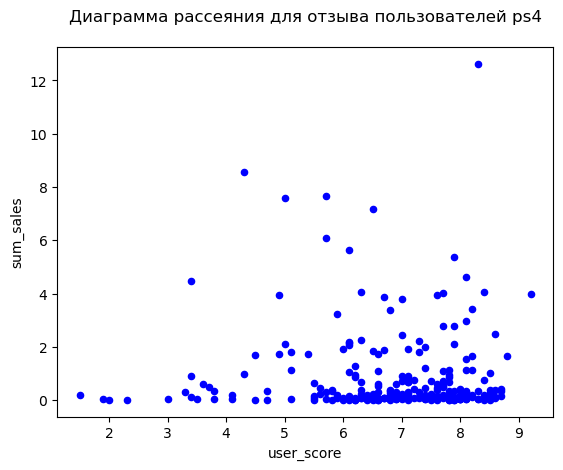

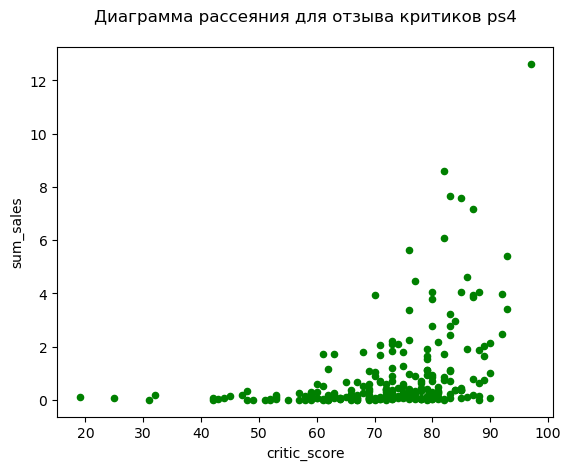

In [12]:
ps4_sales = data_actual.query('platform == "ps4"')
ps4_sales

ps4_sales.plot(x='user_score', y='sum_sales', kind='scatter', color = 'Blue', title='Диаграмма рассеяния для отзыва пользователей ps4\n')
ps4_sales.plot(x='critic_score', y='sum_sales', kind='scatter', color = 'Green',  title='Диаграмма рассеяния для отзыва критиков ps4\n')

ps4_corr = ps4_sales.loc[:,['sum_sales', 'critic_score', 'user_score']]
ps4_corr.corr()

Судя из графиков и данных корреляции можно сказать что между продажами и оценками критиков прямая зависимость. Чем выше оценки критиков, тем больше продажи. При этом между оценками критиков и пользователей такая же зависимость. 

Между оценкамм пользователей и продажами корреляция слабая. 

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


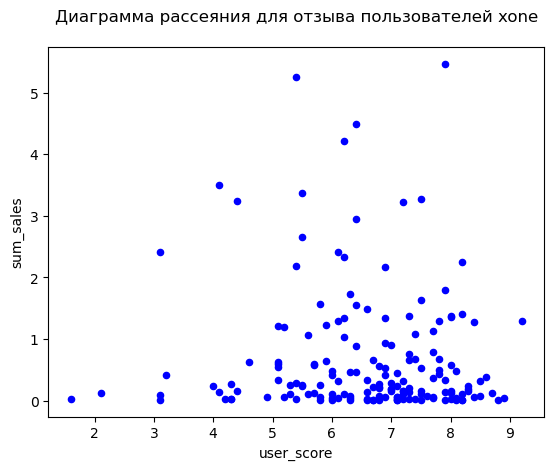

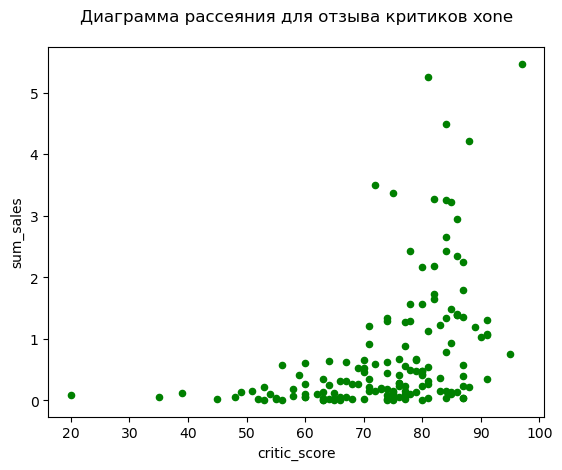

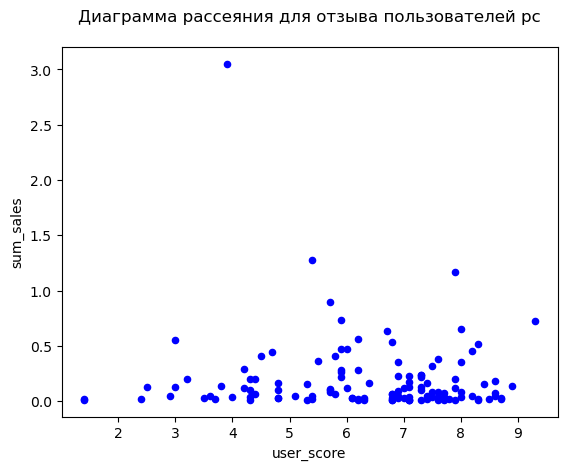

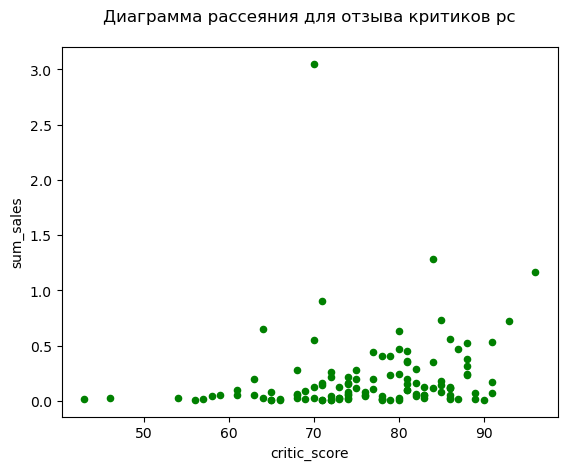

In [13]:
xone_sales = data_actual.query('platform == "xone"')
xone_sales

xone_sales.plot(x='user_score', y='sum_sales', kind='scatter', color = 'Blue', 
                title='Диаграмма рассеяния для отзыва пользователей xone\n')
xone_sales.plot(x='critic_score', y='sum_sales', kind='scatter', color = 'Green',  
                title='Диаграмма рассеяния для отзыва критиков xone\n')

xone_corr = xone_sales.loc[:,['sum_sales', 'critic_score', 'user_score']]
display(xone_corr.corr())
pc_sales = data_actual.query('platform == "pc"')
pc_sales

pc_sales.plot(x='user_score', y='sum_sales', kind='scatter', color = 'Blue', 
              title='Диаграмма рассеяния для отзыва пользователей pc\n')
pc_sales.plot(x='critic_score', y='sum_sales', kind='scatter', color = 'Green',  
              title='Диаграмма рассеяния для отзыва критиков pc\n')

pc_corr = pc_sales.loc[:,['sum_sales', 'critic_score', 'user_score']]
display(pc_corr.corr())

Судя по данным платформ pc, xone зависимость остается такая же.

,sum_sales
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55
fighting,28.22
racing,27.52
platform,18.09
adventure,17.55


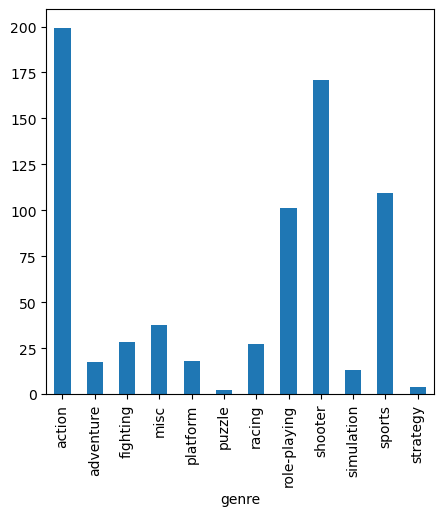

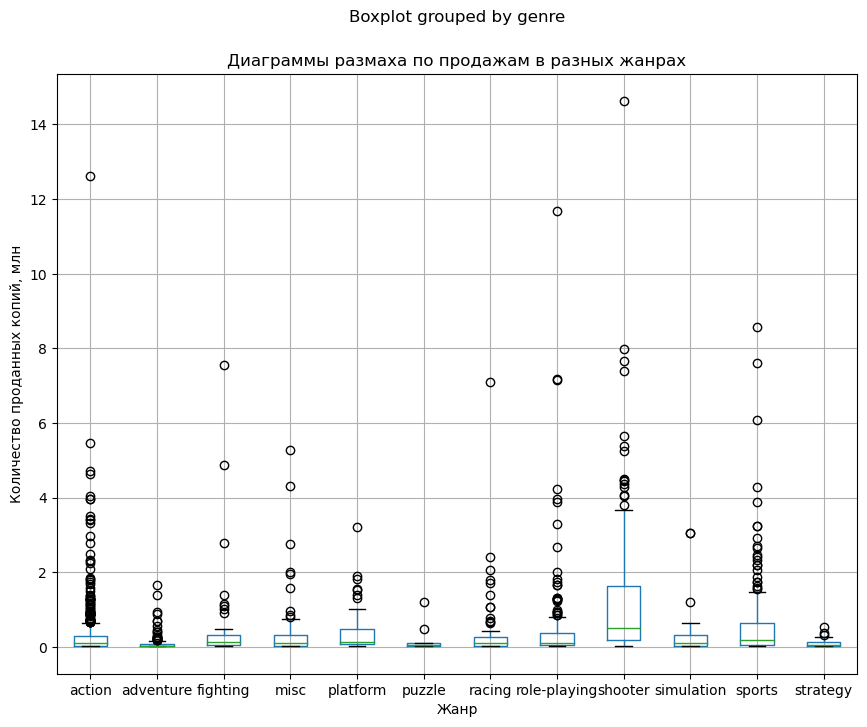

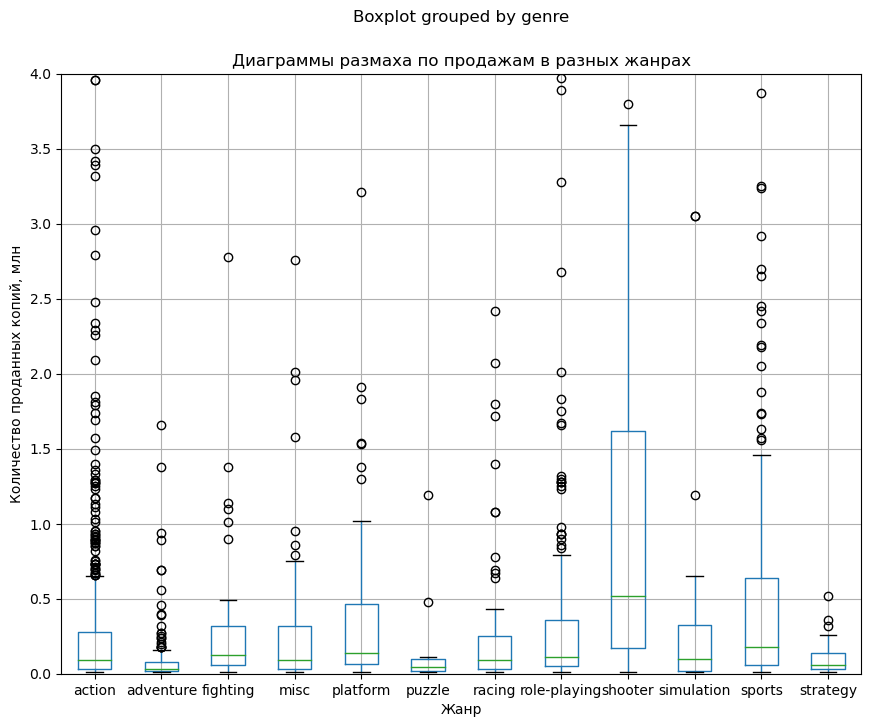

In [14]:
genre_actual = pd.pivot_table(data_actual, index='genre', values='sum_sales', aggfunc='sum')
genre_actual.sort_values('sum_sales', ascending=False)
genre_actual.plot(y='sum_sales',kind='bar', legend = False, figsize = (5,5))
display(genre_actual.sort_values('sum_sales', ascending=False))

#genre_actual.boxplot(column='sum_sales', by='genre', grid=True, figsize=(10,5))

data_actual[['sum_sales', 'genre']].boxplot(column='sum_sales', by='genre', figsize=(10,8))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.show()


data_actual[['sum_sales', 'genre']].boxplot(column='sum_sales', by='genre', figsize=(10,8))
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 4)
plt.show()

Самые продаваемые жанры по колличеству бестселлеро-выбросов это action, shooter, sports, role-playing.

Самые менее продаваемые это strategy и puzzle.

По медианным продажам в топе находится shooter, sports, platform. Эти жанры являются более стабильными.

### Портрет пользователя каждого региона

Топ-5 платформ в регионе NA


,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05



Топ-5 платформ в регионе EU


,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12



Топ-5 платформ в регионе JP


,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


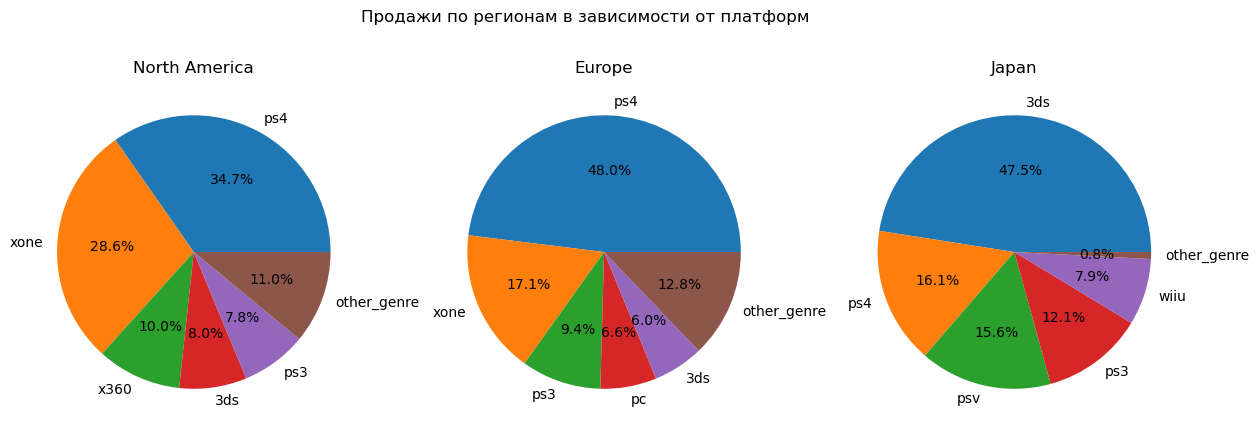

In [15]:
top5_platform_na = data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)
print('Топ-5 платформ в регионе NA')
display(top5_platform_na.head(5))

top5_platform_eu = data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False)
print('\nТоп-5 платформ в регионе EU')
display(top5_platform_eu.head(5))

top5_platform_jp = data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False)
print('\nТоп-5 платформ в регионе JP')
display(top5_platform_jp.head(5))

regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = ['North America', 'Europe', 'Japan']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по регионам в зависимости от платформ')
for i in range(3):
  data_region = (data_actual.groupby('platform')[regions[i]].sum().
            reset_index().
            sort_values(regions[i], ascending = False, ignore_index = True).
            head())
  data_region = data_region.append({'platform': 'other_genre', regions[i]:data_actual[regions[i]].sum() - data_region[regions[i]].sum()}, ignore_index = True)
  axs[i].pie(data_region[regions[i]], labels = data_region['platform'], autopct='%1.1f%%')

  axs[i].set_title(region_names[i])   # Зададим название региона.
plt.show()

В Северной Америке и Европе топ 5 платформ похож, на первых двух местах ps4, xone. Различие в том что в Северной Америке в топе находится x360, что и понятно так как xbox родом из США. В Европе же в топе находтся PC.

Сильно отличается Япония, топ занимают домашние платформы.

Топ-5 жанров в регионе NA


,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05



Топ-5 жанров в регионе EU


,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13



Топ-5 жанров в регионе JP


,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


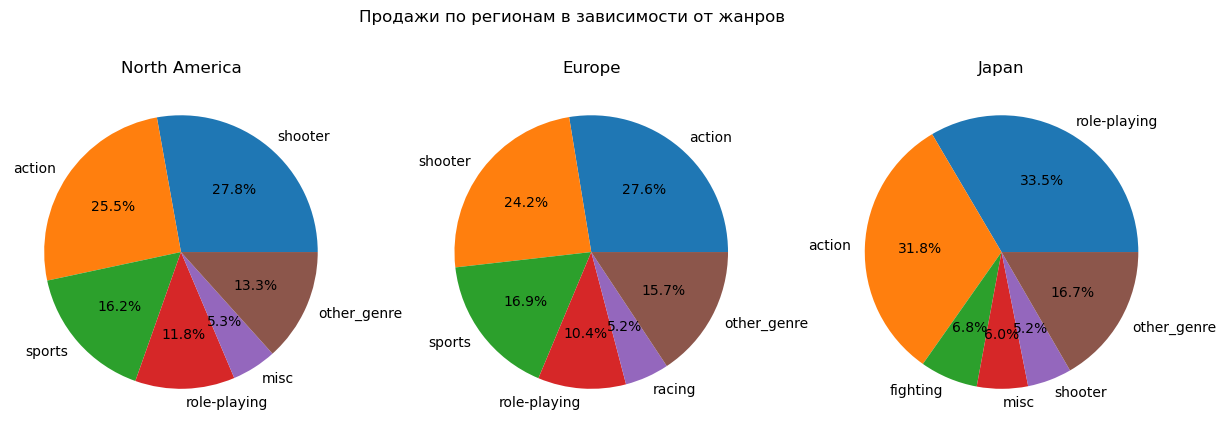

In [16]:
top5_genre_na = data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)
print('Топ-5 жанров в регионе NA')
display(top5_genre_na.head(5))

top5_genre_eu = data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False)
print('\nТоп-5 жанров в регионе EU')
display(top5_genre_eu.head(5))

top5_genre_jp = data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False)
print('\nТоп-5 жанров в регионе JP')
display(top5_genre_jp.head(5))

#top5_genre_na.plot(y='na_sales', kind='pie', figsize=(10,10), autopct='%1.1f%%', title='топ жанров северной америки')
#top5_genre_eu.plot(y='eu_sales', kind='pie', figsize=(10,10), autopct='%1.1f%%', title='топ жанров европы')
#top5_genre_jp.plot(y='jp_sales', kind='pie', figsize=(10,10), autopct='%1.1f%%', title='топ жанров японии')


regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = ['North America', 'Europe', 'Japan']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по регионам в зависимости от жанров')
for i in range(3):
  data_region = (data_actual.groupby('genre')[regions[i]].sum().
            reset_index().
            sort_values(regions[i], ascending = False, ignore_index = True).
            head(5))
  data_region = data_region.append({'genre': 'other_genre', regions[i]:data_actual[regions[i]].sum() - data_region[regions[i]].sum()}, ignore_index = True)
  axs[i].pie(data_region[regions[i]], labels = data_region['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(region_names[i])
plt.show()

Картина схожа с топом платформ. Различие между Северной Америкой и Европой, в том что в Европе больше предпочитают гонки.
В Японии самым популярным жанором является role-playing.

In [17]:
esbr_rating_sale_na= data_actual.pivot_table(index = 'rating', 
                                             values = 'na_sales', 
                                             aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)
print('Зависимость продаж от рейтинга ESBR в регионе NA')
display(esbr_rating_sale_na)

esbr_rating_sale_eu= data_actual.pivot_table(index = 'rating', 
                                             values = 'eu_sales', 
                                             aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False)
print('Зависимость продаж от рейтинга ESBR в регионе EU')
display(esbr_rating_sale_eu)

esbr_rating_sale_jp= data_actual.pivot_table(index = 'rating', 
                                             values = 'jp_sales', 
                                             aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False)
print('Зависимость продаж от рейтинга ESBR в регионе JP')
display(esbr_rating_sale_jp)

Зависимость продаж от рейтинга ESBR в регионе NA


,na_sales
rating,
m,96.42
unknown,64.72
e,50.74
t,38.95
e10+,33.23


Зависимость продаж от рейтинга ESBR в регионе EU


,eu_sales
rating,
m,93.44
unknown,58.95
e,58.06
t,34.07
e10+,26.16


Зависимость продаж от рейтинга ESBR в регионе JP


,jp_sales
rating,
unknown,56.90
t,14.78
e,8.94
m,8.01
e10+,4.46


В Европе и Северной Америке популярность игр с определенным рейтингом одинаковая.

В Японии же на первое место вышла группа с неопределенным рейтингом, далее идет рейтинг 13+, возможно это из за желания игроделов охватить большую аудиторию.

Портреты

Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры.

Европейский игрок - от 17 лет, любит играть на PS4, или на XOne, любит игры на реакцию и шутеры.

Японский игрок - от 13 лет, любит играть на 3DS или PS4, любит тратить время на RPG и экшены.

### Проверка гипотез

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны;

Альтернативная: Средние пользовательские рейтинги платформ Xbox One и PC неравны;

In [18]:
data_actual_without_nan = data_actual.query('user_score >0') #Исключим пропуски из выборки

xone = data_actual_without_nan.query('platform =="xone"')
xone_rating = xone['user_score'] #Сделаем срез данных по платформе xone


pc = data_actual_without_nan.query('platform =="pc"')
pc_rating = pc['user_score']#Сделаем срез данных по платформе PC


variance_xone =  np.var(xone['user_score'], ddof=1)
print('Дисперсия рейтинга платформы Xone:', variance_xone)#Найдем дисперсию двух срезов данных

variance_pc =  np.var(pc['user_score'], ddof=1)
print('Дисперсия рейтинга платформы PC:', variance_pc)

print('\nОтношение дисперсий:', variance_xone / variance_pc)

Дисперсия рейтинга платформы Xone: 1.8910066518846989
Дисперсия рейтинга платформы PC: 2.9011543151334522

Отношение дисперсий: 0.6518118122915889


In [19]:
#Зададим критический уровень статистической значимости
alpha = .05 
#Проверим гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(xone_rating, pc_rating, equal_var = False) #Так как дисперсии сильно отличаются указал False

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


В результате получили что нулевая гипотеза не отвергается.
Хоть и средние пользовательские рейтинги платформ Xbox One и PC неодинаковы, с вероятностью в почти 12% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии.

In [20]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны;

Альтернативная: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») неравны.

In [21]:
action = data_actual_without_nan.query('genre =="action"')
action_rating = action['user_score']#Сделаем срез данных по жанру action из среза данных без пропусков

sports = data_actual_without_nan.query('genre =="sports"')
sports_rating = sports['user_score']#Сделаем срез данных по жанру sports

#Найдем дисперсию двух срезов данных:
variance_action =  np.var(action['user_score'], ddof=1)
print('Дисперсия рейтинга жанра Action:', variance_action)

variance_sports =  np.var(sports['user_score'], ddof=1)
print('Дисперсия рейтинга жанра Sports:', variance_sports)

print('\nОтношение дисперсий:', variance_action / variance_sports)

Дисперсия рейтинга жанра Action: 1.898476658476659
Дисперсия рейтинга жанра Sports: 3.4469791276090476

Отношение дисперсий: 0.5507653479159628


In [22]:
#Зададим критический уровень статистической значимости
alpha = .05 

#Проверим гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(action_rating, sports_rating, equal_var = False) #Так как дисперсии сильно отличаются указал False

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


В результате получили что нулевая гипотеза отвергается, получить такие данные в рамках этой гипотезы вряд ли возможно.
Хоть и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports неодинаковы, с вероятностью в почти 100% такое или большее различие скорее всего получится. 

### Общий вывод

В результате исследования было выяснено, что срок жизни платформы приходится на 4-6 лет, актуальный период нужно подобрать так чтобы на рабочий год эти платформы все еще были в топах продаж. 

Самыми актуальными платформами являются ps4, xone, pc, 3ds.

Главными потенциально прибыльными по продажам игр к 2017 году платформами являются xone и ps4, pc.

Между продажами и оценками критиков прямая зависимость. Чем выше оценки критиков, тем больше продажи.

Самые продаваемые жанры это action, shooter, sports, role-playing. Самые менее продаваемые это strategy и puzzle. Самые  стабильные по продажам жанры shooter, sports, platform. 

Топ-5 платформ в регионе NA
ps4 34.7%
xone 28.6%	
x360 10%	
3ds	8%
ps3	7.8%

Топ-5 платформ в регионе EU
ps4	48%
xone 17.1%
ps3	9.4%
pc	6.6%
3ds	6%

Топ-5 платформ в регионе JP	
3ds	47.5%
ps4	16.1%
psv	15.6%
ps3	12.1%
wiiu 7.9%

Топ-5 жанров в регионе NA	
shooter	27.8%
action 25.5%
sports 16.2%
role-playing 11.8%	
misc 5.3%

Топ-5 жанров в регионе EU
action 27.6%
shooter	24.2%
sports	16.9%
role-playing 10.4%	
racing	5.2%

Топ-5 жанров в регионе JP	
role-playing 33.5%
action	31.8%
fighting	6.8%
misc 6%
shooter 5.2%	

При проверки гипотез выяснилось:
Хоть и средние пользовательские рейтинги платформ Xbox One и PC неодинаковы, с вероятностью в почти 12% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии.

Хоть и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports неодинаковы, с вероятностью в почти 100% такое или большее различие скорее всего получится. Это явно слишком большая вероятность, можно сделать вывод о значимом неравенстве.